# Binary classification between benign and malignant tumors

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import biutils 



## README / Utils 

Helper functions are defined in biutils.py

Restart the kernel for this notebook to reload any update made to the utils file (after you have saved and run the new changes to the util py file).

```python
- def update_tbl(new_df,tbl_name,drop=False):     
    """
    Save data to the quant.db database
        new_df: data
        tbl_name: data table name
        drop: set to True to drop existing table and update 
    """
    
- tbl = def get_tbl(tbl_name):
    """
    Retrieve data from the quant.db database
        tbl_name: data table name
    """

- def all_tbl():
    """
    Print out all existing table in the quant.db databse
    """
```

In [2]:
# print out all tables
biutils.all_tbl()

('data',)
('no_out3',)
('binary',)
('bizdata',)
('zdata',)
('h_combine',)
('no_out',)
('bino_out',)


In [3]:
# retrieve table from database
binary = biutils.get_tbl('binary')
no_out = biutils.get_tbl('bino_out')
zdata = biutils.get_tbl("bizdata")

Define the list of quantitated metabolites, metrics, etc here

In [4]:
mcolumns = list(binary.columns) # an array of the column names
mcolumns.remove('voxel') # removing the element 'voxel'
mcolumns.remove('label')
mcolumns.remove('dataset')
metlist = list(set([i.split(" ")[0] for i in mcolumns])) # extract the first string before the space within each element
print(len(metlist))
metrics = ['FAT14ratio','ratioWAT47_1d','ratioFAT14_1d','ratioFAT54_1d']
oned = ['nws_ffrac','nws_wfrac','nws_wfratio']

28


In [5]:
binary.to_csv('199data.csv')

Define the list of final variables, rename a selected portion of the dataset with those variables and targets 

In [16]:
# final feature list
intervars = ['triglycerylfatcrossp(TGFRupper) FAT14ratio', 
'methylfat(FMETD10) FAT14ratio', 
'olefinicfat(UFD54) FAT14ratio', 
'fat(4p2_3p9) FAT14ratio', 
'methylenefat(FAT21) FAT14ratio', 
'fat(2p06_1p32) ratioWAT47_1d', 
'adc', 'gly+myo FAT14ratio', 
'fat(1p32_0p9) FAT14ratio']

intername = ['TGFRupper/FAT14','FMETD/FAT14','UFD54/FAT14','CP8/FAT14',
'FAT21/FAT14','CP4/FAT14','ADC','mI+Gly/FAT14','CP2/FAT14'] # renames of final feature
# subsetting the original data frame (no_out) by selecting the columns in intervars + voxel, dataset, and label
renamed = no_out[intervars+['voxel','dataset','label']] 
# rename those columns based on a dictionary, where the key is the original name, the value is the new names
renamed = renamed.rename(columns=dict(zip(intervars,intername)))


In [17]:
renamed

,TGFRupper/FAT14,FMETD/FAT14,UFD54/FAT14,CP8/FAT14,FAT21/FAT14,CP4/FAT14,ADC,mI+Gly/FAT14,CP2/FAT14,voxel,dataset,label
0,0.00098,0.24773,0.12049,0.00332,0.04573,0.02083,1.7780,0.00033,0.10401,data005-15-15-9,data005,benign
1,0.00076,0.23583,0.10294,0.00269,0.04148,0.02217,1.7780,0.00030,0.09597,data005-15-16-10,data005,benign
2,0.00099,0.23623,0.12527,0.00300,0.04350,0.02095,1.7780,0.00035,0.09615,data005-15-16-9,data005,benign
3,0.00072,0.24820,0.10295,0.00312,0.04131,0.02350,1.7780,0.00027,0.10296,data005-16-15-10,data005,benign
4,0.00070,0.24409,0.10955,0.00306,0.04077,0.02312,1.7780,0.00027,0.09186,data005-16-16-10,data005,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.00192,0.21083,0.18987,0.00168,0.04641,0.56093,1.1188,0.00098,0.13854,dataStB-15-16-9,dataStB,malignant
432,0.00141,0.17584,0.16196,0.00118,0.04435,0.66624,1.1188,0.00082,0.21185,dataStB-15-17-8,dataStB,malignant
433,0.00141,0.19302,0.12773,0.00114,0.04426,0.96266,1.1188,0.00115,0.22176,dataStB-15-17-9,dataStB,malignant
434,0.00085,0.18658,0.05547,0.00125,0.03645,3.17658,1.1188,0.00084,0.19965,dataStB-15-18-10,dataStB,malignant


In [24]:
re_dict = dict(zip(intervars,intername))
re_dict

{'triglycerylfatcrossp(TGFRupper) FAT14ratio': 'TGFRupper/FAT14',
 'methylfat(FMETD10) FAT14ratio': 'FMETD/FAT14',
 'olefinicfat(UFD54) FAT14ratio': 'UFD54/FAT14',
 'fat(4p2_3p9) FAT14ratio': 'CP8/FAT14',
 'methylenefat(FAT21) FAT14ratio': 'FAT21/FAT14',
 'fat(2p06_1p32) ratioWAT47_1d': 'CP4/FAT14',
 'adc': 'ADC',
 'gly+myo FAT14ratio': 'mI+Gly/FAT14',
 'fat(1p32_0p9) FAT14ratio': 'CP2/FAT14'}

## Prelimary analysis

Visualize class distributions of a given dataset
```python
maglinantd, benignd, healthyd = def data_const(data):
    '''
    Visualize the distributions of benign, healthy, and maglinant labels in all voxels & datasets
    Input: data (with labels)
    Output: the list of maglinant dataset, the list of benign dataset, the list of healthy dataset
    '''
```

number of malignant voxels:
247
number of benign voxels:
197


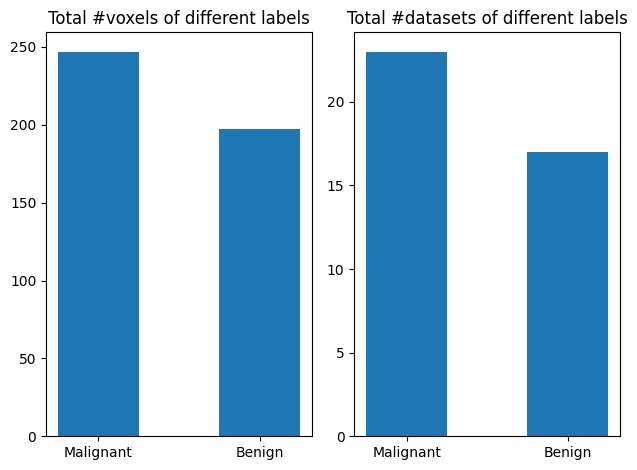

In [26]:
maglinantd, benignd = biutils.data_const(binary)

In [19]:
#print lists of databases
print("matlinang datasets: "+str(len(maglinantd)))
print(maglinantd)
print("benign datasets: "+str(len(benignd)))
print(benignd)

matlinang datasets: 22
['dataAH', 'dataAM', 'dataAST', 'dataCJ', 'dataEC', 'dataEP', 'dataFS', 'dataGA', 'dataGS', 'dataHB', 'dataJH', 'dataKL', 'dataKM', 'dataLA', 'dataLK', 'dataLM', 'dataLN', 'dataLO', 'dataLW', 'dataMLT', 'dataSM', 'dataStB']
benign datasets: 17
['data005', 'data009', 'data012', 'data014', 'data015', 'data016', 'data018', 'data019', 'data022', 'data028', 'data032', 'data040', 'data044', 'dataBJF', 'dataDM', 'dataFN', 'dataMM']


Calculate average age 

In [17]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.1 MB/s eta 0:00:0000:0100:01


In [20]:
# Read the excel file with age information. Check sheet 4 for format
agepath = "/Users/linlin/Downloads/199data/Breast_recon_details_maybe_useful.xlsx"
additional = pd.read_excel(agepath,sheet_name='Sheet4',index_col=False,names=["ds","ADC","age"],header=None)
# This code modifies the 'ds' column by the rule specified in the apply function
additional['ds'] = additional['ds'].apply(lambda x:"data"+x.split("-")[2])
# This code maps the adc value and age value based on the 'ds' column using the dict structures
age_dict = dict(zip(list(additional["ds"]),list(additional["age"])))
adc_dict = dict(zip(list(additional["ds"]),list(additional["ADC"])))

In [21]:
additional

,ds,ADC,age
0,dataEC,0.96640,41
1,dataEP,1.44180,50
2,dataKL,1.37620,44
3,dataLA,1.03770,51
4,dataLM,0.85060,45
...,...,...,...
65,data031,0.14260,45
66,data037,0.06287,60
67,data039,0.20020,40
68,data042,0.04970,59


In [22]:
print("Average ages")
mage = []
bage = []
for d in maglinantd:
    mage.append(age_dict.get(d))
for d in benignd:
    bage.append(age_dict.get(d))
print('malignant: '+str(np.mean(mage)))
print('benign: '+str(np.mean(bage)))

Average ages
malignant: 52.72727272727273
benign: 37.8235294117647


### Normalize based on label and remove outliers

In [22]:
rez = renamed
for var in intername:
    rez.loc[rez.label == 'malignant',var] = renamed.loc[renamed.label == 'malignant',var].apply(lambda x: (x - renamed.loc[renamed.label == 'malignant',var].mean()) / renamed.loc[renamed.label == 'malignant',var].std())
    rez.loc[rez.label == 'benign',var] = renamed.loc[renamed.label == 'benign',var].apply(lambda x: (x - renamed.loc[renamed.label == 'benign',var].mean()) / renamed.loc[renamed.label == 'benign',var].std())

In [23]:
rez.head()

,TGFRupper/FAT14,FMETD/FAT14,UFD54/FAT14,CP8/FAT14,FAT21/FAT14,CP4/FAT14,ADC,mI+Gly/FAT14,CP2/FAT14,voxel,dataset,label
0,0.162238,-0.389101,0.271206,0.307564,-0.464449,-0.331352,0.747048,-0.224121,-0.275581,data005-15-15-9,data005,benign
1,-0.135071,-0.436062,-0.039914,-0.028714,-0.526096,-0.330405,0.747048,-0.239832,-0.389933,data005-15-16-10,data005,benign
2,0.175752,-0.434483,0.355944,0.136756,-0.496796,-0.331267,0.747048,-0.213647,-0.387373,data005-15-16-9,data005,benign
3,-0.189128,-0.387246,-0.039736,0.200809,-0.528562,-0.329466,0.747048,-0.255543,-0.290515,data005-16-15-10,data005,benign
4,-0.216156,-0.403465,0.077266,0.168783,-0.536395,-0.329734,0.747048,-0.255543,-0.448390,data005-16-16-10,data005,benign


### Distributions of metabolite ratios

Boxplot: 
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range  

Using nested boxplot to show metabolite concentrations among different groups

In [21]:
def new_met_dist(df, met):
    """
    New version with the combined metabolite ratio, for one metabolite
    """
    # Using nested boxplot to show metabolite concentrations among different groups 
    r, c = divmod(len(met), 3)
    fig, ax = plt.subplots(r, 3, sharex=True, figsize=(15, 15))
    for i in range(len(met)):
        r, c = divmod(i, 3)
        sns.boxplot(
            y=met[i],
            x="label",
            hue="label",
            data=df,
            ax=ax[r, c],
            orient='v',
            whis=2
        )
        ax[r, c].get_legend().remove()
        ax[r, c].set_xlabel(met[i], fontsize=20)  # Set x-axis label font size
        ax[r, c].set_ylabel('z-score', fontsize=20)  # Set y-axis label font size
    fig.suptitle('Feature Statistics\n', fontsize=20)  # Set subtitle font size
    plt.tight_layout()

/var/folders/zm/03ps49bx5fsdfvh986zjlbr00000gn/T/ipykernel_52481/995482016.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
/var/folders/zm/03ps49bx5fsdfvh986zjlbr00000gn/T/ipykernel_52481/995482016.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
/var/folders/zm/03ps49bx5fsdfvh986zjlbr00000gn/T/ipykernel_52481/995482016.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
/var/folders/zm/03ps49bx5fsdfvh986zjlbr00000gn/T/ipykernel_52481/995482016.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
/var/folders/zm/03ps49bx5fsdfvh986zjlbr00000gn/T/ipykernel_52481/995482016.py:14: UserWarning: FixedFormatter should only be used together with FixedLoc

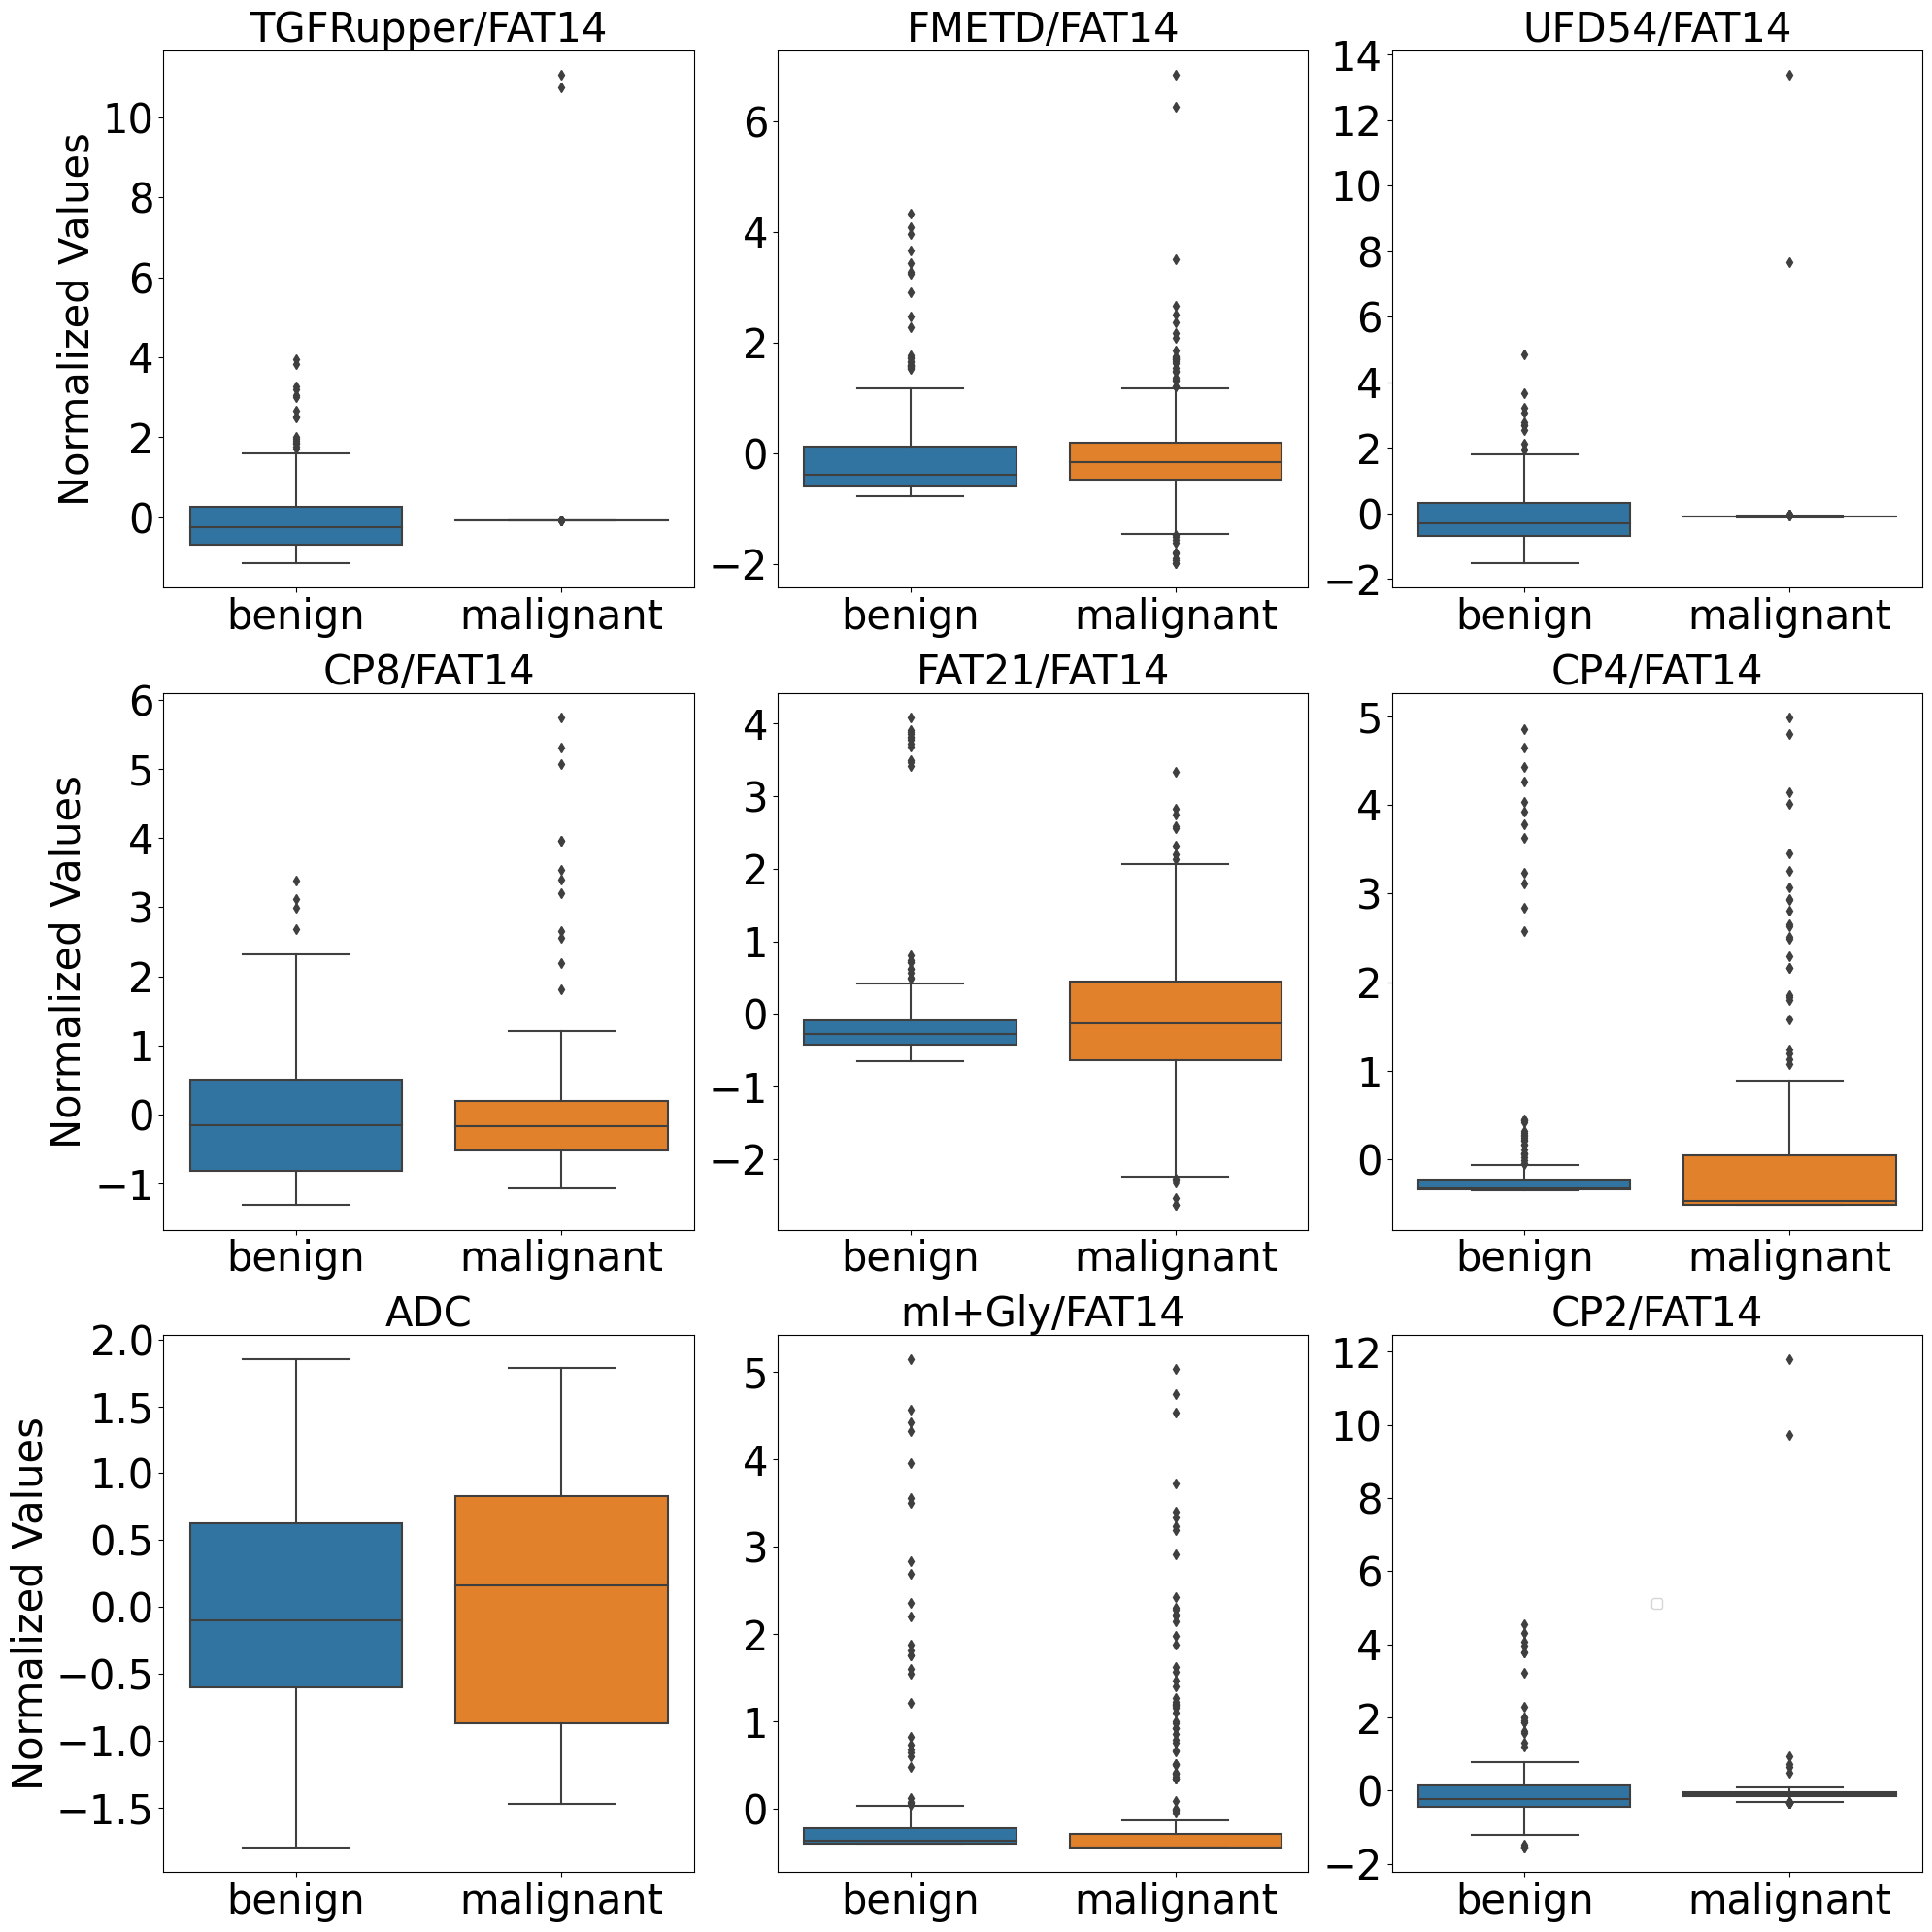

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

# Iterate over each feature and create boxplots
for i, column in enumerate(intername):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=renamed.label.values, y=rez[column], ax=ax)
    ax.set_xlabel('',fontsize=30)
    ax.set_ylabel('',fontsize=30)
    ax.set_title(column,fontsize=30)
    ax.tick_params(axis='x', labelsize=30)  # Set the desired tick size for x-axis
    #ax.tick_params(axis='y', labelsize=15) 
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
    

axes[0,0].set_ylabel('Normalized Values')
axes[1,0].set_ylabel('Normalized Values')
axes[2,0].set_ylabel('Normalized Values')
# Remove the last empty subplot
#fig.delaxes(axes[1, 3])

# Place the legend in the last subplot
ax_legend = axes[2, 2]
handles, labels = ax_legend.get_legend_handles_labels()
ax_legend.legend(handles, labels, loc='center', ncol=3)

plt.tight_layout()
plt.show()


### Get outlier voxel

In [24]:
#source of outliers from normalized data
#absolute z values greater than 8
#normalized zdata
outsrc = list(zdata[abs((zdata.loc[:,mcolumns])>8).any(axis=1)].voxel.values)
# no_outlier dataset
no_out = binary[~binary.voxel.isin(outsrc)]
#biutils.update_tbl(no_out,'bino_out',drop=True)# run his if you want to replace old tble

In [28]:
# outlier source
outsrc

['data028-17-15-9',
 'data028-17-16-9',
 'dataEP-12-17-10',
 'dataEP-13-17-9',
 'dataGS-11-21-10',
 'dataGS-11-21-11',
 'dataTN-24-28-10',
 'dataTN-26-29-10']

number of malignant voxels:
241
number of benign voxels:
195


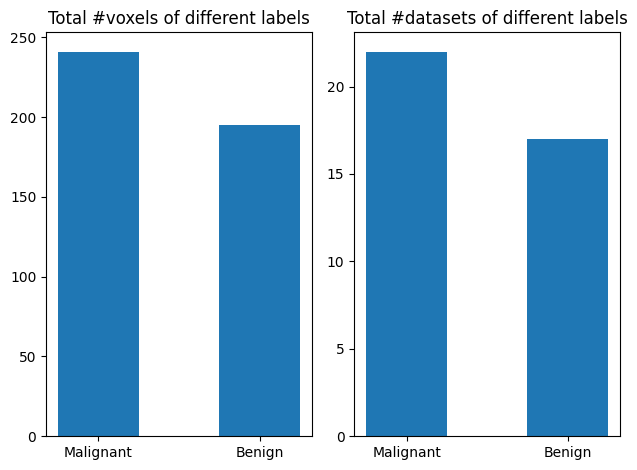

In [25]:
#outlier removed, class distributions
maglinantd, benignd = biutils.data_const(no_out)